In [1]:
# Step 2: Importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.core.display import display, HTML

# Additional statements
color = sns.color_palette()
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline


C:\Users\Cesar\AppData\Local\Temp\ipykernel_22452\3836457697.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
elo = pd.read_csv('elo.csv')
br = pd.read_csv('br.csv')
pie = pd.read_csv('pie.csv')
playerInfo = pd.read_csv('player.wikipedia.csv')
plus_minus_df = pd.read_csv('plus_minus.csv')
salary = pd.read_csv('salary.csv')
elo.head()

,Unnamed: 0,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF
0,0,Chicago Bulls,41,104,0.888882,0.021680,2500.0,1519,East
1,1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0,1420,West
2,2,Sacramento Kings,41,101,0.721928,0.017608,1075.0,1393,West
3,3,Miami Heat,41,100,0.805400,0.019643,1350.0,1569,East
4,4,Toronto Raptors,41,100,0.813050,0.019830,1125.0,1600,East


In [3]:
br.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [4]:
pie.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [5]:
playerInfo.head()

,Unnamed: 0,names,pageviews,timestamps,wikipedia_handles
0,0,Russell Westbrook,3400,2016010100,Russell_Westbrook
1,1,Russell Westbrook,2893,2016010200,Russell_Westbrook
2,2,Russell Westbrook,3209,2016010300,Russell_Westbrook
3,3,Russell Westbrook,2531,2016010400,Russell_Westbrook
4,4,Russell Westbrook,2599,2016010500,Russell_Westbrook


In [6]:
plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


In [7]:
salary.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


In [8]:
# Renaming columns
plus_minus_df.rename(columns={"NAME": "PLAYER", "WINS": "WINS_RPM"}, inplace=True)

# Splitting player names and updating the PLAYER column
plus_minus_df["PLAYER"] = plus_minus_df["PLAYER"].apply(lambda x: x.split(",")[0])

# Dropping the original PLAYER column if necessary
# plus_minus_df.drop(["NAME"], inplace=True, axis=1)  # Uncomment this line if you want to drop the original PLAYER column

# Displaying the head of the DataFrame
print(plus_minus_df.head())


              PLAYER TEAM  GP   MPG  ORPM  DRPM   RPM  WINS_RPM
0       LeBron James  CLE  74  37.8  6.49  1.93  8.42     20.43
1      Stephen Curry   GS  79  33.4  7.27  0.14  7.41     18.80
2       Jimmy Butler  CHI  76  37.0  4.82  1.80  6.62     17.35
3  Russell Westbrook  OKC  81  34.6  6.74 -0.47  6.27     17.34
4     Draymond Green   GS  76  32.5  1.55  5.59  7.14     16.84


In [9]:
plus_minus_df.head()

,PLAYER,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM
0,LeBron James,CLE,74,37.8,6.49,1.93,8.42,20.43
1,Stephen Curry,GS,79,33.4,7.27,0.14,7.41,18.80
2,Jimmy Butler,CHI,76,37.0,4.82,1.80,6.62,17.35
3,Russell Westbrook,OKC,81,34.6,6.74,-0.47,6.27,17.34
4,Draymond Green,GS,76,32.5,1.55,5.59,7.14,16.84


In [10]:
nba_players_df = br.copy()
# Renaming columns
nba_players_df.rename(columns={"Player": "PLAYER", "Pos": "POSITION", "Tm": "TEAM", "Age": "AGE", "PS/G": "POINTS"}, inplace=True)

# Dropping specified columns and removing duplicates
nba_players_df.drop(["G", "GS", "TEAM"], inplace=True, axis=1)

# Displaying the head of the DataFrame to verify changes
print(nba_players_df.head())

   Rk             PLAYER POSITION  AGE    MP    FG   FGA    FG%   3P  3PA  \
0   1  Russell Westbrook       PG   28  34.6  10.2  24.0  0.425  2.5  7.2   
1   2       James Harden       PG   27  36.4   8.3  18.9  0.440  3.2  9.3   
2   3      Isaiah Thomas       PG   27  33.8   9.0  19.4  0.463  3.2  8.5   
3   4      Anthony Davis        C   23  36.1  10.3  20.3  0.505  0.5  1.8   
4   5      DeMar DeRozan       SG   27  35.4   9.7  20.9  0.467  0.4  1.7   

   ...    FT%  ORB  DRB   TRB   AST  STL  BLK  TOV   PF  POINTS  
0  ...  0.845  1.7  9.0  10.7  10.4  1.6  0.4  5.4  2.3    31.6  
1  ...  0.847  1.2  7.0   8.1  11.2  1.5  0.5  5.7  2.7    29.1  
2  ...  0.909  0.6  2.1   2.7   5.9  0.9  0.2  2.8  2.2    28.9  
3  ...  0.802  2.3  9.5  11.8   2.1  1.3  2.2  2.4  2.2    28.0  
4  ...  0.842  0.9  4.3   5.2   3.9  1.1  0.2  2.4  1.8    27.3  

[5 rows x 27 columns]


In [11]:
merged_df = pd.merge(plus_minus_df, nba_players_df, on='PLAYER', how='inner')
merged_df.head()

,PLAYER,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,Rk,POSITION,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS
0,LeBron James,CLE,74,37.8,6.49,1.93,8.42,20.43,8,SF,...,0.674,1.3,7.3,8.6,8.7,1.2,0.6,4.1,1.8,26.4
1,Stephen Curry,GS,79,33.4,7.27,0.14,7.41,18.80,10,PG,...,0.898,0.8,3.7,4.5,6.6,1.8,0.2,3.0,2.3,25.3
2,Jimmy Butler,CHI,76,37.0,4.82,1.80,6.62,17.35,14,SF,...,0.865,1.7,4.5,6.2,5.5,1.9,0.4,2.1,1.5,23.9
3,Russell Westbrook,OKC,81,34.6,6.74,-0.47,6.27,17.34,1,PG,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
4,Draymond Green,GS,76,32.5,1.55,5.59,7.14,16.84,142,PF,...,0.709,1.3,6.6,7.9,7.0,2.0,1.4,2.4,2.9,10.2


In [12]:
pie_subset_df = pie[["PLAYER", "PIE", "PACE", "W"]]

# Merging pie_subset_df with merged_df on the column "PLAYER"
final_merged_df = pd.merge(merged_df, pie_subset_df, on="PLAYER", how="inner")

# Printing out the head of the merged DataFrame
final_merged_df.head()


,PLAYER,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,Rk,POSITION,...,TRB,AST,STL,BLK,TOV,PF,POINTS,PIE,PACE,W
0,LeBron James,CLE,74,37.8,6.49,1.93,8.42,20.43,8,SF,...,8.6,8.7,1.2,0.6,4.1,1.8,26.4,18.3,98.38,51
1,Stephen Curry,GS,79,33.4,7.27,0.14,7.41,18.80,10,PG,...,4.5,6.6,1.8,0.2,3.0,2.3,25.3,15.1,105.08,65
2,Jimmy Butler,CHI,76,37.0,4.82,1.80,6.62,17.35,14,SF,...,6.2,5.5,1.9,0.4,2.1,1.5,23.9,16.4,97.78,40
3,Russell Westbrook,OKC,81,34.6,6.74,-0.47,6.27,17.34,1,PG,...,10.7,10.4,1.6,0.4,5.4,2.3,31.6,23.0,102.31,46
4,Draymond Green,GS,76,32.5,1.55,5.59,7.14,16.84,142,PF,...,7.9,7.0,2.0,1.4,2.4,2.9,10.2,11.7,103.34,62


In [13]:
nba_players_df.to_csv("YourFirstName_YourLastName_nba_2017_players_stats_combined.csv")

In [14]:
# changing name
salary.rename(columns={"NAME": "PLAYER"}, inplace=True)

# adding a column
salary["SALARY_MILLIONS"] = round(salary["SALARY"] / 1000000, 2)
salary.head()

,PLAYER,POSITION,TEAM,SALARY,SALARY_MILLIONS
0,LeBron James,SF,Cleveland Cavaliers,30963450.0,30.96
1,Mike Conley,PG,Memphis Grizzlies,26540100.0,26.54
2,Al Horford,C,Boston Celtics,26540100.0,26.54
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0,25.00
4,Carmelo Anthony,SF,New York Knicks,24559380.0,24.56


In [15]:
# Perform set difference operation
diff = list(set(nba_players_df["PLAYER"].values.tolist()) - set(salary["PLAYER"].values.tolist()))

# Check the length of the difference
print("Length of diff:", len(diff))

# Print out the players who do not have salary information
print("Players without salary information:", diff)

Length of diff: 141
Players without salary information: ['Stephen Zimmerman', 'Deron Williams', 'JaMychal Green', 'Salah Mejri', 'Ian Clark', 'Cristiano Felicio', 'Dorian Finney-Smith', "Johnny O'Bryant", 'Joe Harris', 'Joel Anthony', 'Matt Barnes', 'Terrence Jones', 'Taurean Waller-Prince', 'Damian Jones', 'Richard Jefferson', 'C.J. Miles', 'Quinn Cook', 'Daniel Ochefu', 'Jose Calderon', 'Richaun Holmes', 'Tim Quarterman', 'Georges Niang', 'Clint Capela', 'Patrick McCaw', 'Jordan McRae', 'Josh Huestis', 'Steve Novak', 'Tyler Ulis', 'Montrezl Harrell', 'Okaro White', 'J.R. Smith', 'Darrun Hilliard', 'Ty Lawson', 'Lou Williams', 'Chinanu Onuaku', 'Norris Cole', 'Axel Toupane', 'Norman Powell', 'Alex Poythress', 'Raul Neto', 'Joel Bolomboy', 'Damjan Rudez', 'Cheick Diallo', 'James Ennis', 'Chris Andersen', 'Patricio Garino', 'Bobby Brown', 'Rodney McGruder', 'DeAndre Jordan', 'Edy Tavares', 'Kevon Looney', 'Seth Curry', 'Jonathon Simmons', 'Tim Hardaway', 'Shawn Long', 'Jarrod Uthoff', '

In [16]:
nba_players_with_salary_df = nba_players_df.merge(salary, on="PLAYER")
nba_players_with_salary_df.to_csv("YourFirstName_YourLastName_nba_2017_nba_players_with_salary.csv", index=False)
nba_players_with_salary_df.head()

,Rk,PLAYER,POSITION_x,AGE,MP,FG,FGA,FG%,3P,3PA,...,AST,STL,BLK,TOV,PF,POINTS,POSITION_y,TEAM,SALARY,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,10.4,1.6,0.4,5.4,2.3,31.6,PG,Oklahoma City Thunder,26500000.0,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,11.2,1.5,0.5,5.7,2.7,29.1,PG,Houston Rockets,26500000.0,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,5.9,0.9,0.2,2.8,2.2,28.9,PG,Boston Celtics,6587132.0,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,2.1,1.3,2.2,2.4,2.2,28.0,PF,New Orleans Pelicans,22116750.0,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,4.6,1.4,1.3,3.7,3.9,27.0,C,Sacramento Kings,16957900.0,16.96


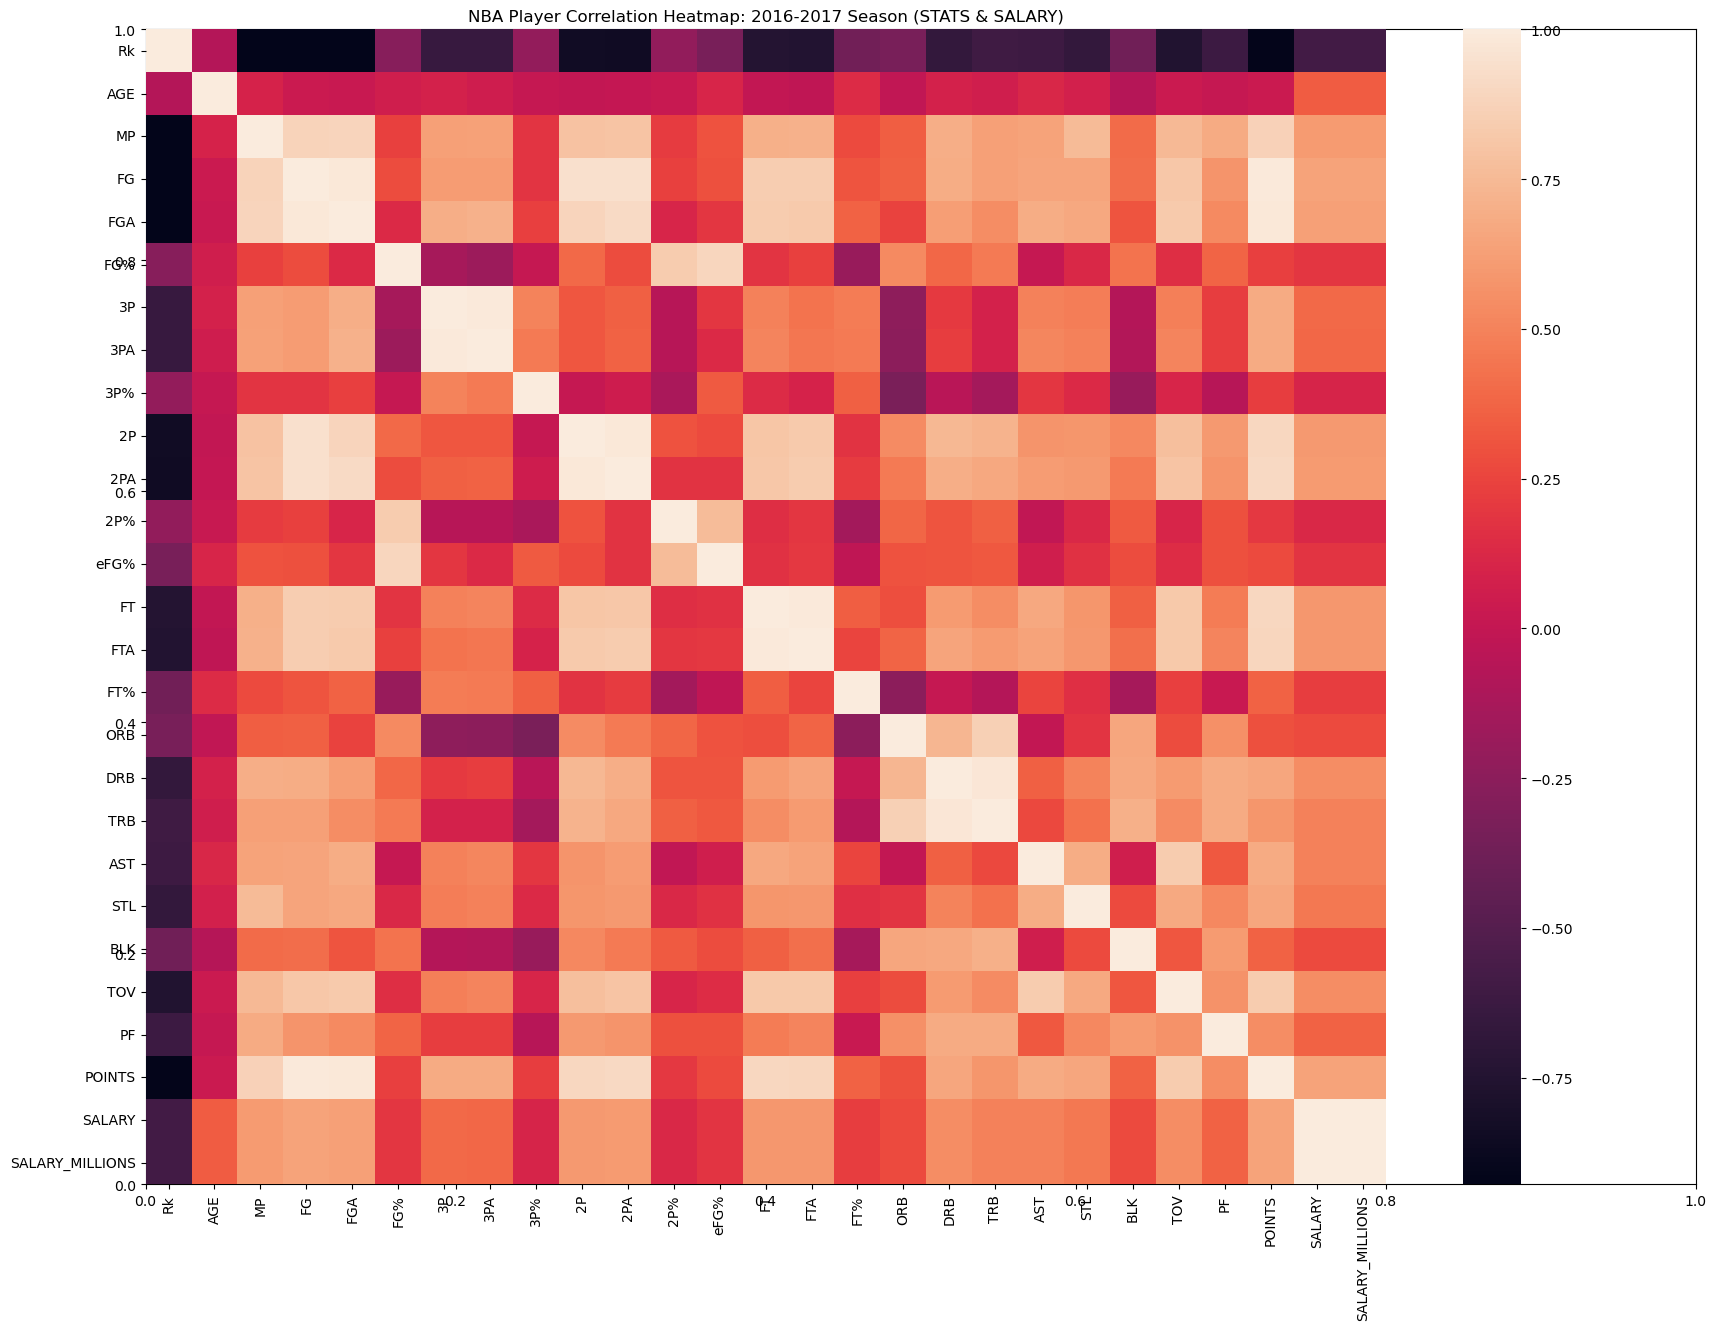

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = nba_players_with_salary_df.select_dtypes(include=['float64', 'int64'])

plt.subplots(figsize=(20, 15))
ax = plt.axes()
ax.set_title("NBA Player Correlation Heatmap: 2016-2017 Season (STATS & SALARY)")
corr = numeric_cols.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()